In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("insurance_main_dataset.csv")

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [6]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df.iloc[:,1] = label.fit_transform(df.iloc[:,1])
df.iloc[:,5] = label.fit_transform(df.iloc[:,5])
df.iloc[:,4] = label.fit_transform(df.iloc[:,4])

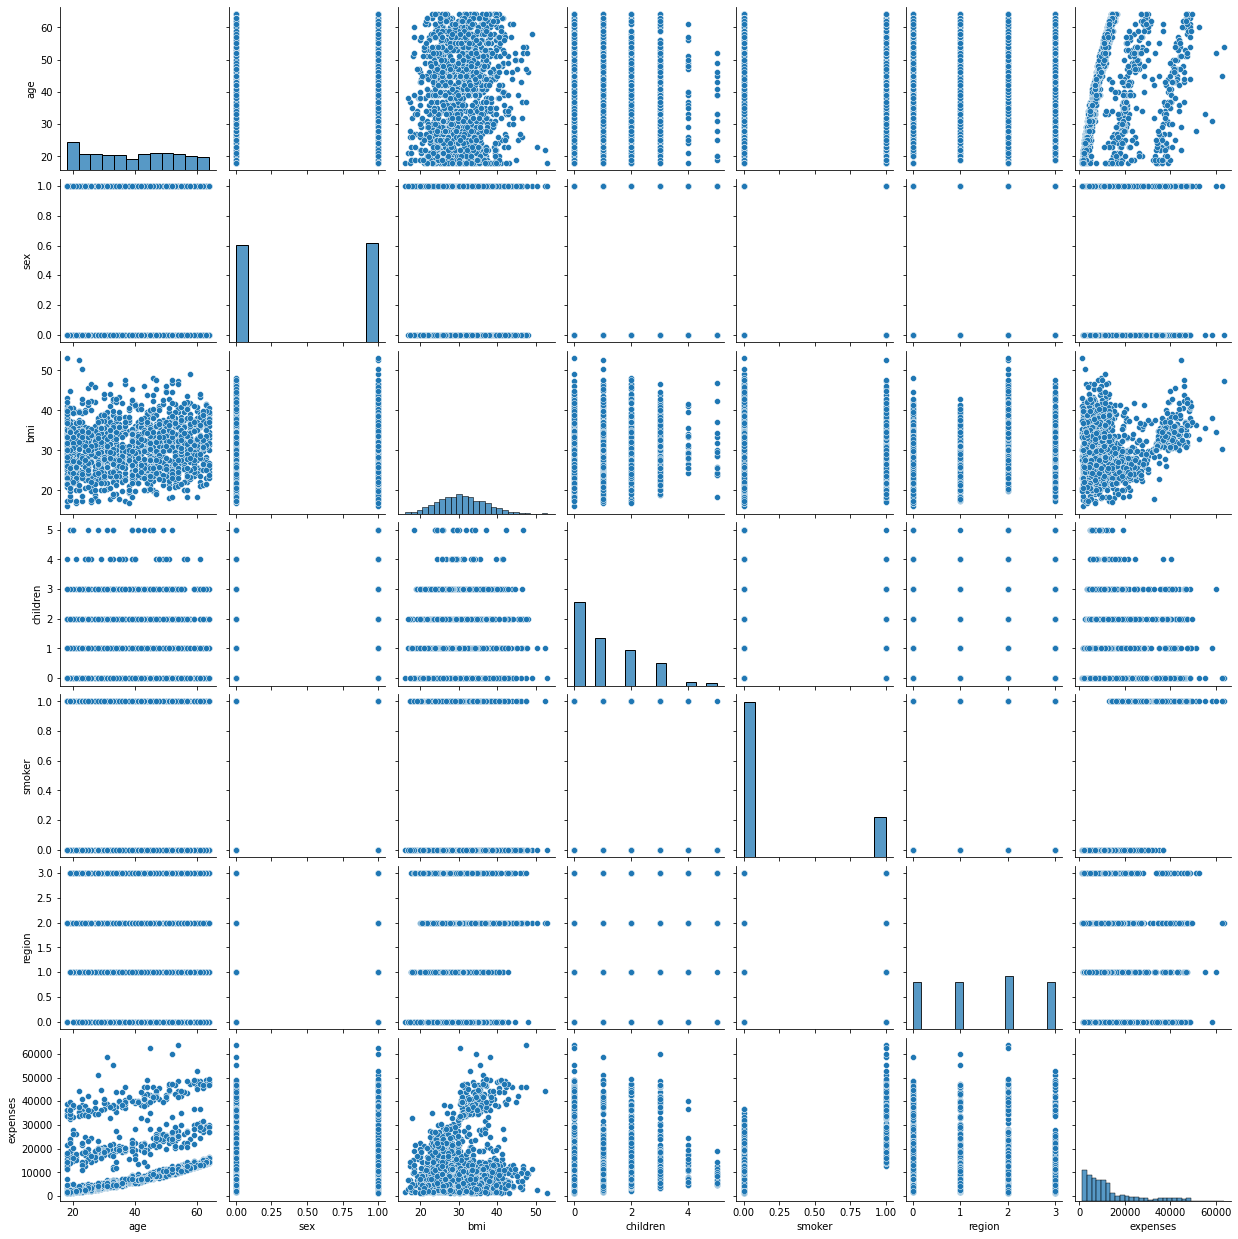

In [8]:
sns.pairplot(df)

In [9]:
X = df[['bmi','age','smoker','children']]
Y = df['expenses']

In [10]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,Y,test_size=0.25)

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
regressor = DecisionTreeRegressor(random_state=0)
#cross_val_score(regressor, X_train, y_train, cv=10)
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)
mse_dt = mean_squared_error(y_test,y_predict,squared=False)
print(mse_dt)

6815.829810540368


In [17]:
import xgboost as xg
from sklearn.model_selection import cross_val_score
xgb_r = xg.XGBRegressor()
#cross_val_score(regressor, X_train, y_train, cv=10)
xgb_r.fit(X_train, y_train)
y_predict = xgb_r.predict(X_test)
mse_xg = mean_squared_error(y_test,y_predict,squared=False)
print(mse_xg)

[16:32:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
4139.256885764097


In [20]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test,y_predict)
r2_score

0.8695657810622063

In [23]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_train,regressor.predict(X_train))
r2_score

0.7493471137838847

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#cross_val_score(regressor, X_train, y_train, cv=10)
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)
mse_dt = mean_squared_error(y_test,y_predict,squared=False)
print(mse_dt)

5794.734525633646


In [13]:
import pickle
pickle.dump(regressor, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))

In [14]:
%pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle

lazy_reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = lazy_reg.fit(X_train, X_test, y_train, y_test)

 98%|█████████▊| 41/42 [00:31<00:00,  1.07it/s]

[16:27:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



100%|██████████| 42/42 [00:31<00:00,  1.33it/s]


In [16]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.87,0.87,4139.26,0.14
GradientBoostingRegressor,0.87,0.87,4155.47,0.14
LGBMRegressor,0.84,0.85,4493.88,0.08
HistGradientBoostingRegressor,0.84,0.84,4597.92,0.32
KNeighborsRegressor,0.83,0.83,4717.23,0.01
RandomForestRegressor,0.82,0.82,4850.09,0.29
BaggingRegressor,0.79,0.80,5158.58,0.16
ExtraTreesRegressor,0.78,0.79,5293.41,0.20
AdaBoostRegressor,0.78,0.79,5311.56,0.09
